In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
data = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data.drop(data.columns[0], axis=1, inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data.shape

(53940, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

C:\Users\easky\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


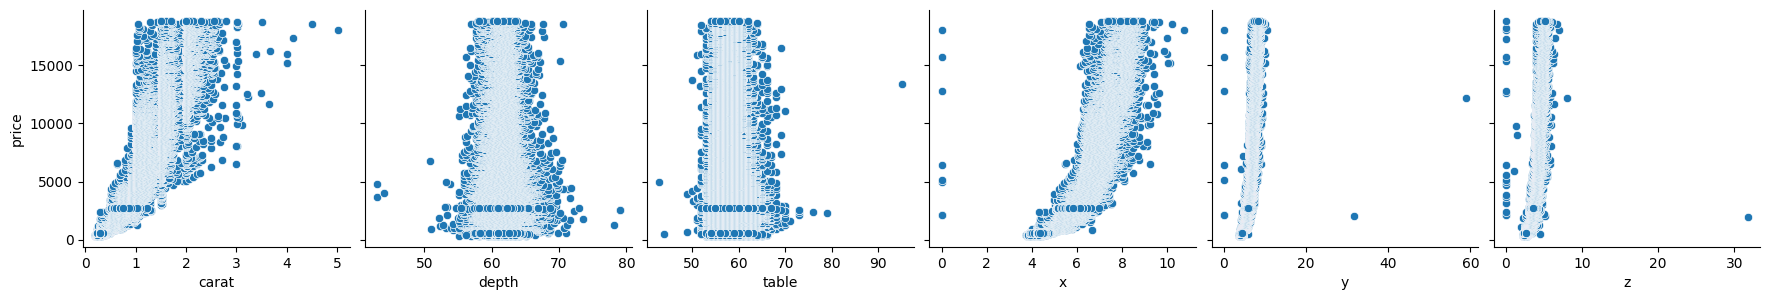

In [8]:
sns.pairplot(data=data, y_vars=["price"], x_vars=["carat", "depth", "table", "x", "y", "z"], height=3)
plt.show()

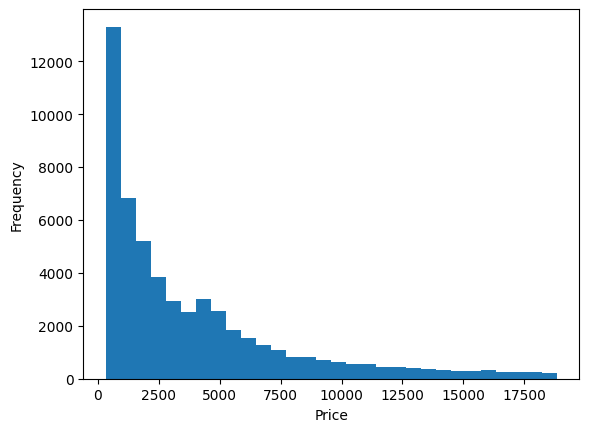

In [9]:
plt.hist(data['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Before appyling heatmap we need to encode strings

In [12]:
label_encoder = preprocessing.LabelEncoder()
data["cut"] = label_encoder.fit_transform(data["cut"])
data["color"] = label_encoder.fit_transform(data["color"])
data["clarity"] = label_encoder.fit_transform(data["clarity"])

In [62]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


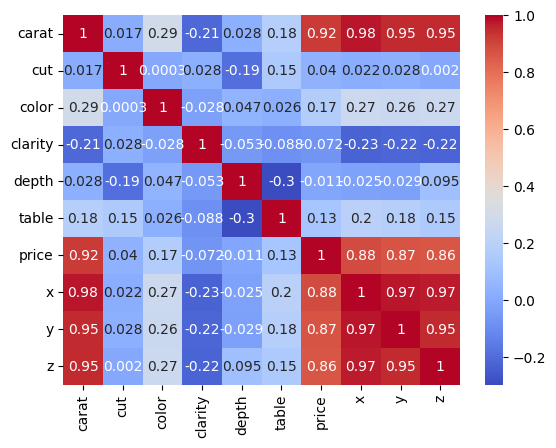

In [13]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:

# Calculating the correlation between features and 'price' and sort it from most important feature to less important
correlation_with_price = data.corr()['price'].abs().sort_values(ascending=False)

# Displaying the most important features affecting 'price'
print(correlation_with_price)

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
clarity    0.071535
cut        0.039860
depth      0.010647
Name: price, dtype: float64


In [32]:
y = data['price']
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [36]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
12011,1.09,2,4,2,61.4,57.0,6.66,6.60,4.07
43078,0.50,3,2,2,59.6,60.0,5.15,5.12,3.06
20406,1.51,4,6,7,62.9,58.0,7.21,7.33,4.57
25198,2.04,4,4,3,63.2,58.0,8.10,8.00,5.09
1105,0.71,3,0,2,59.7,59.0,5.80,5.82,3.47
...,...,...,...,...,...,...,...,...,...
18996,1.01,3,1,4,60.8,59.0,6.42,6.46,3.92
52222,0.70,4,5,6,59.5,58.0,5.78,5.81,3.45
39941,0.28,4,3,5,61.3,57.0,4.21,4.24,2.59
27600,2.03,2,2,3,63.3,55.0,7.96,8.05,5.08


In [34]:
y_train

12011     5149
43078     1378
20406     8770
25198    13790
1105      2913
         ...  
18996     7821
52222     2484
39941      492
27600    18458
27361      646
Name: price, Length: 43152, dtype: int64

In [54]:
std_model = LinearRegression()
l1_model = Lasso(alpha=1)
l2_model = Ridge(alpha=1)

std_model.fit(X_train, y_train)
l1_model.fit(X_train, y_train)
l2_model.fit(X_train, y_train)


Ridge(alpha=1)

In [55]:
print(f"---Without regularization: {std_model.score(X_test, y_test)}")
print(f"Lasso (L1) regularization: {l1_model.score(X_test, y_test)}")
print(f"Ridge (L2) regularization: {l2_model.score(X_test, y_test)}")

---Without regularization: 0.8922638696267399
Lasso (L1) regularization: 0.8922193274509904
Ridge (L2) regularization: 0.8922560390910884


# X_new is the first 5 row of X_train and used algorithm to predict Y_train values, compare X_new and Y_train

In [75]:
X_new = pd.DataFrame({
    'carat': [1.09, 0.50, 1.51, 2.04, 0.71],  # Carat values
    'cut': [2, 3, 4, 4, 3],  # Cut values (2 = 'Premium', 3 = 'Good', 4 = 'Very Good')
    'color': [4, 2, 6, 4, 0],  # Color values (4 = 'E', 2 = 'D', 6 = 'H', 0 = 'J')
    'clarity': [2, 2, 7, 3, 2],  # Clarity values (2 = 'SI1', 7 = 'VS2', 3 = 'SI2')
    'depth': [61.4, 59.6, 62.9, 63.2, 59.7],  # Depth values
    'table': [57.0, 60.0, 58.0, 58.0, 59.0],  # Table values
    'x': [6.66, 5.15, 7.21, 8.10, 5.80],  # x values
    'y': [6.60, 5.12, 7.33, 8.00, 5.82],  # y values
    'z': [4.07, 3.06, 4.57, 5.09, 3.47],  # z values
})

# Make predictions on the new input data
predicted_outcome = std_model.predict(X_new)

# Create a DataFrame to store the input data and the predicted outcome
prediction_df = pd.DataFrame(X_new)  # Copy the input data
prediction_df['PredictedOutcome'] = predicted_outcome

# Display the DataFrame with the predicted outcome
print(prediction_df)
print(y_train.head())

   carat  cut  color  clarity  depth  table     x     y     z  \
0   1.09    2      4        2   61.4   57.0  6.66  6.60  4.07   
1   0.50    3      2        2   59.6   60.0  5.15  5.12  3.06   
2   1.51    4      6        7   62.9   58.0  7.21  7.33  4.57   
3   2.04    4      4        3   63.2   58.0  8.10  8.00  5.09   
4   0.71    3      0        2   59.7   59.0  5.80  5.82  3.47   

   PredictedOutcome  
0       5231.994132  
1       1085.578699  
2       9936.183827  
3      14051.935332  
4       3263.954594  
12011     5149
43078     1378
20406     8770
25198    13790
1105      2913
Name: price, dtype: int64


In [76]:
X_new = pd.DataFrame({
    'carat': [1.09, 0.50, 1.51, 2.04, 0.71],  # Carat values
    'cut': [2, 3, 4, 4, 3],  # Cut values (2 = 'Premium', 3 = 'Good', 4 = 'Very Good')
    'color': [4, 2, 6, 4, 0],  # Color values (4 = 'E', 2 = 'D', 6 = 'H', 0 = 'J')
    'clarity': [2, 2, 7, 3, 2],  # Clarity values (2 = 'SI1', 7 = 'VS2', 3 = 'SI2')
    'depth': [61.4, 59.6, 62.9, 63.2, 59.7],  # Depth values
    'table': [57.0, 60.0, 58.0, 58.0, 59.0],  # Table values
    'x': [6.66, 5.15, 7.21, 8.10, 5.80],  # x values
    'y': [6.60, 5.12, 7.33, 8.00, 5.82],  # y values
    'z': [4.07, 3.06, 4.57, 5.09, 3.47],  # z values
})

# Make predictions on the new input data
predicted_outcome = l1_model.predict(X_new)

# Create a DataFrame to store the input data and the predicted outcome
prediction_df = pd.DataFrame(X_new)  # Copy the input data
prediction_df['PredictedOutcome'] = predicted_outcome

# Display the DataFrame with the predicted outcome
print(prediction_df)
print(y_train.head())

   carat  cut  color  clarity  depth  table     x     y     z  \
0   1.09    2      4        2   61.4   57.0  6.66  6.60  4.07   
1   0.50    3      2        2   59.6   60.0  5.15  5.12  3.06   
2   1.51    4      6        7   62.9   58.0  7.21  7.33  4.57   
3   2.04    4      4        3   63.2   58.0  8.10  8.00  5.09   
4   0.71    3      0        2   59.7   59.0  5.80  5.82  3.47   

   PredictedOutcome  
0       5246.754263  
1       1088.052902  
2       9927.840415  
3      14022.807006  
4       3270.942957  
12011     5149
43078     1378
20406     8770
25198    13790
1105      2913
Name: price, dtype: int64


In [77]:
X_new = pd.DataFrame({
    'carat': [1.09, 0.50, 1.51, 2.04, 0.71],  # Carat values
    'cut': [2, 3, 4, 4, 3],  # Cut values (2 = 'Premium', 3 = 'Good', 4 = 'Very Good')
    'color': [4, 2, 6, 4, 0],  # Color values (4 = 'E', 2 = 'D', 6 = 'H', 0 = 'J')
    'clarity': [2, 2, 7, 3, 2],  # Clarity values (2 = 'SI1', 7 = 'VS2', 3 = 'SI2')
    'depth': [61.4, 59.6, 62.9, 63.2, 59.7],  # Depth values
    'table': [57.0, 60.0, 58.0, 58.0, 59.0],  # Table values
    'x': [6.66, 5.15, 7.21, 8.10, 5.80],  # x values
    'y': [6.60, 5.12, 7.33, 8.00, 5.82],  # y values
    'z': [4.07, 3.06, 4.57, 5.09, 3.47],  # z values
})

# Make predictions on the new input data
predicted_outcome = l2_model.predict(X_new)

# Create a DataFrame to store the input data and the predicted outcome
prediction_df = pd.DataFrame(X_new)  # Copy the input data
prediction_df['PredictedOutcome'] = predicted_outcome

# Display the DataFrame with the predicted outcome
print(prediction_df)
print(y_train.head())

   carat  cut  color  clarity  depth  table     x     y     z  \
0   1.09    2      4        2   61.4   57.0  6.66  6.60  4.07   
1   0.50    3      2        2   59.6   60.0  5.15  5.12  3.06   
2   1.51    4      6        7   62.9   58.0  7.21  7.33  4.57   
3   2.04    4      4        3   63.2   58.0  8.10  8.00  5.09   
4   0.71    3      0        2   59.7   59.0  5.80  5.82  3.47   

   PredictedOutcome  
0       5234.243005  
1       1085.975015  
2       9934.958419  
3      14046.042759  
4       3265.432364  
12011     5149
43078     1378
20406     8770
25198    13790
1105      2913
Name: price, dtype: int64
